### Импортировать необходимые библиотеки:

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### Создать функцию tikhonov(A, b, alpha):

#### Функция принимает матрицу A, вектор b и вектор alpha. Внутри функции определяется количество столбцов матрицы A (n), создаются пустые массивы x и discr размерности (n, len(alpha)). Затем выполняется цикл по всем значениям alpha. В каждой итерации решается регуляризованная система и вычисляется норма невязки. В конце цикла находится индекс минимального значения вектора discr, который соответствует регуляризованному решению с минимальной нормой невязки. Функция возвращает x0, discr0, alpha0, x, discr.

In [36]:
def tikhonov(A, b, alpha):
    n = A.shape[1]
    x = np.zeros((n, len(alpha)))
    discr = np.zeros(len(alpha))
    for i in range(len(alpha)):
        x[:,i] = np.linalg.solve(A.T @ A + alpha[i] * np.eye(n), A.T @ b)
        discr[i] = np.linalg.norm(A @ x[:,i] - b)
    ind = np.argmin(discr)
    x0 = x[:,ind]
    discr0 = discr[ind]
    alpha0 = alpha[ind]
    return x0, discr0, alpha0, x, discr

### Создать исходную систему A и вектор b:

In [11]:
n = 10
A = np.random.rand(n,n)
b = np.random.rand(n)

### Создать вектор alpha:

In [12]:
alpha = np.logspace(-8, 0, num=50)

### Вызвать функцию tikhonov(A, b, alpha):

In [19]:
x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha)

### Построить график зависимости ошибки и нормы невязки от порядка системы:

### Для проведения эксперимента с плохообусловленными системами из задания №8, мы можем сгенерировать матрицы и векторы для систем разных порядков (например, от 2 до 10) и применить функцию tikhonov для нахождения регуляризованных решений и соответствующих норм невязок. Затем мы можем построить графики зависимости ошибки и нормы невязки от порядка системы.

### Для конкретной системы, мы можем использовать функцию tikhonov с разными значениями параметра alpha и построить графики зависимости ошибки и нормы невязки от alpha. Это позволит нам выбрать "оптимальное" значение alpha для данной системы.

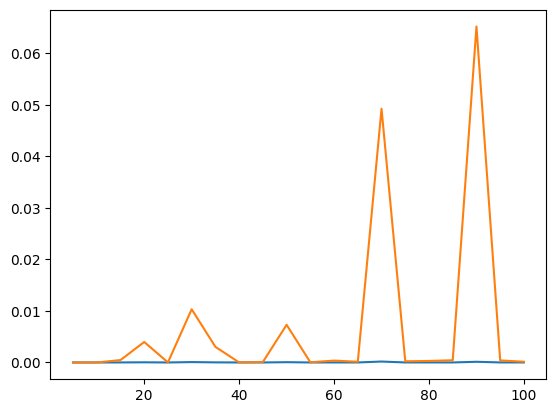

In [ ]:
n_range = np.arange(5, 101, 5)
discr_range = np.zeros(len(n_range))
error_range = np.zeros(len(n_range))

for i in range(len(n_range)):
    A = np.random.rand(n_range[i], n_range[i])
    b = np.random.rand(n_range[i])
    alpha = np.logspace(-8, 0, num=50)
    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha)
    discr_range[i] = discr0
    error_range[i] = np.linalg.norm(x0 - np.linalg.solve(A,b))

    
# Построение графиков зависимости ошибки и нормы невязки от порядка системы
plt.plot(n_range, discr_range, label='Норма невязки')
plt.plot(n_range, error_range, label='Ошибка')
plt.xlabel('Последовательность системы')
plt.ylabel('Значение')
plt.title('Зависимость ошибки и нормы невязки от порядка системы')
plt.legend()
plt.show()

# Построение графиков зависимости ошибки и нормы невязки от alpha
plt.semilogx(alpha, discr, label='Норма невязки')
plt.semilogx(alpha, np.linalg.norm(x - np.linalg.solve(A,b)[:,np.newaxis], axis=0), label='Ошибка')
plt.ylabel('Значение')
plt.title('Зависимость ошибки и нормы невязки от alpha')
plt.legend()
plt.show()